**JUST INFORMATION**

Machine Learning is about building programs with tunable parameters (typically an array of floating point values) that are adjusted automatically so as to improve their behavior by adapting to previously seen data. 
1. Supervised Learning - This characteristic makes supervised algorithms a type of predictive models, such that given a set of X data, it can be forecasted dependent Y variable.
2. Unsupervised Learning - Unsupervised algorithms are mainly used in descriptive anlysis and modelling, where is particularly useful to find out insights and information that human expert doesn't know.

In [2]:
# Import useful libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

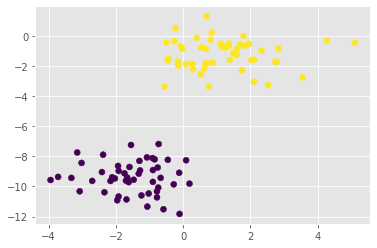

In [9]:
# Knowing Classification problem
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 2)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [10]:
# Build boundary in dataset
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss = 'hinge', alpha = 0.01, 
                    max_iter = 200, fit_intercept = True)
clf.fit(X, y)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=200, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

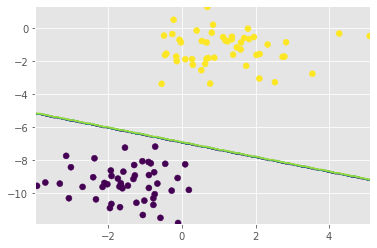

In [14]:
# Plot boundary

X_min, X_max = X[:, 0].min() - 0.05, X[:, 0].max() + 0.05
y_min, y_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05
XX, yy = np.meshgrid(np.arange(X_min, X_max, 0.05), 
                     np.arange(y_min, y_max, .05))
Z = clf.predict(np.c_[XX.ravel(), yy.ravel()]).reshape(XX.shape)
plt.contour(XX, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

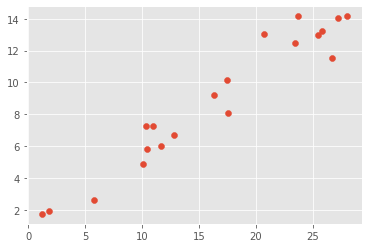

In [19]:
# Knowing regression problem
a = 0.5
b = 1.0

# create random x from 0 - 10
X = 30 * np.random.random(20)
y = a * X + b + np.random.normal(size=X.shape)

plt.scatter(X, y)

In [20]:
# Build line prediction
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X[:, None], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Knowing parameter
print(clf.coef_)
print(clf.intercept_)

[0.48000458]
0.9932706531153679


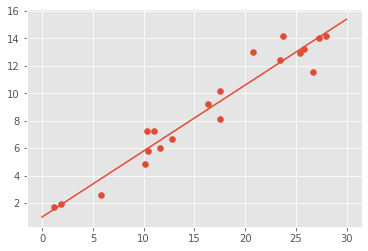

In [23]:
# Visualization
X_new = np.linspace(0, 30, 100)
y_new = clf.predict(X_new[:, None])
plt.scatter(X, y)
plt.plot(X_new, y_new)

In [24]:
# Learning Iris Dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [31]:
n_samples, n_features = iris.data.shape
print("INFORMATION")
print((n_samples, n_features))
print(iris.data[0])
print(iris.target)
print(iris.target_names)

INFORMATION
(150, 4)
[5.1 3.5 1.4 0.2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


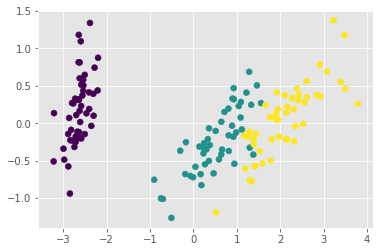

In [33]:
# Build Dimensionality Reduction: PCA
X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(X)
X_reduced = pca.transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)

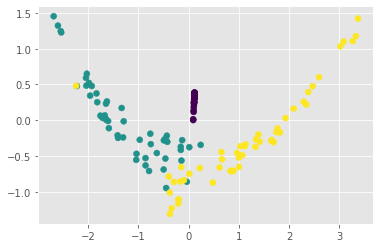

In [34]:
X, y = iris.data, iris.target
from sklearn.manifold import Isomap
pca = Isomap(n_components=3)
pca.fit(X)
X_reduced2 = pca.transform(X)
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y)

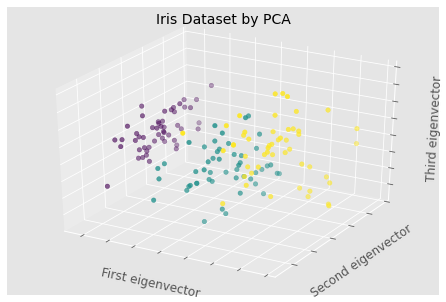

In [35]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Iris Dataset by PCA', size=14)
ax.scatter(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2], c=y)
ax.set_xlabel('First eigenvector')
ax.set_ylabel('Second eigenvector')
ax.set_zlabel('Third eigenvector')
ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())
plt.show()

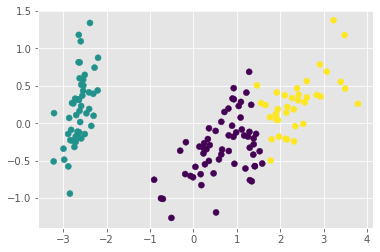

In [37]:
# Build Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred);

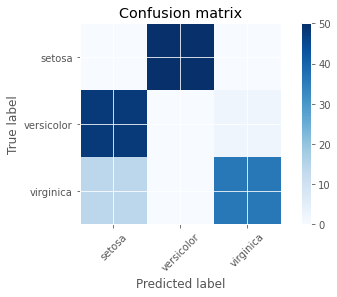

In [38]:
# EVALUATE Model
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)
plot_confusion_matrix(cm)

In [39]:
# How about logistic regression
from sklearn.linear_model import LogisticRegression

from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, 
                                                                    iris.target, 
                                                                    test_size=0.4, 
                                                                    random_state=42)

In [40]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [41]:
float((y_pred == y_test).mean())

1.0

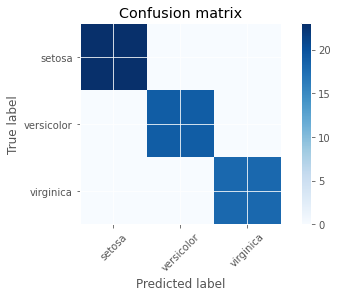

In [42]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

In [47]:
import warnings
warnings.filterwarnings('ignore')

0.9833333333333333 0.9166666666666666 0.9566666666666664 0.021343747458109488


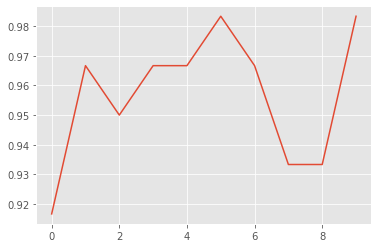

In [48]:
accuracy = []
for i in range(10):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.4, random_state=i)

    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = float((y_pred == y_test).mean())
    accuracy.append(acc)

plt.plot(list(range(10)), accuracy)

accuracy = np.array(accuracy)
print(accuracy.max(), accuracy.min(), accuracy.mean(), accuracy.std())

Available in all Estimators
1. model.fit() : fit training data. For supervised learning applications, this accepts two arguments: the data X and the labels y (e.g. model.fit(X, y)). For unsupervised learning applications, this accepts only a single argument, the data X (e.g. model.fit(X)).

Available in supervised estimators
1. model.predict() : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data X_new (e.g. model.predict(X_new)), and returns the learned label for each object in the array.
2. model.predict_proba() : For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by model.predict().
3. model.score() : for classification or regression problems, most (all?) estimators implement a score method. Scores are between 0 and 1, with a larger score indicating a better fit.

Available in unsupervised estimators
1. model.predict() : predict labels in clustering algorithms.
2. model.transform() : given an unsupervised model, transform new data into the new basis. This also accepts one argument X_new, and returns the new representation of the data based on the unsupervised model.
3. model.fit_transform() : some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.